### Probelm Statement:- Build a model to classify the high revenue customer and low revenue customer to provide the promotion.

In [166]:
# Name: Nikhil Gupta
# Contact No: 8266989159
# Email id: guptanikhil814@gmail.com

In [65]:
#### Inmorting relevent libraries######

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
### Reading the data

data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\STATISTICS AND MACHINE LEARNING\Project\Existing_Base.csv')

In [3]:
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


### Exploratory Data Analysis (EDA)

In [4]:
data.shape

(10155, 32)

In [5]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [6]:
## Checking the distribution of target variable
data['Revenue Grid'].value_counts()

# Here we can see there is a data imbalance in my dataset. We might ask for more observcation for class-1. 

2    9069
1    1086
Name: Revenue Grid, dtype: int64

In [7]:
## Checking the type of data abailavle in dataset.
data.dtypes
# Out of 32, 14 columns have string data and 18 have data of numeric type.

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

In [8]:
## Checking the null value in dataset fo each column.
data.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Revenue Grid                       0
gender                             0
r

In [9]:
## Segregating numeric columns from data set
numeric_col = data.select_dtypes(include= np.number)
numeric_col.columns
col_name = list(numeric_col.columns)
col_name

['REF_NO',
 'year_last_moved',
 'Average Credit Card Transaction',
 'Balance Transfer',
 'Term Deposit',
 'Life Insurance',
 'Medical Insurance',
 'Average A/C Balance',
 'Personal Loan',
 'Investment in Mutual Fund',
 'Investment Tax Saving Bond',
 'Home Loan',
 'Online Purchase Amount',
 'Revenue Grid',
 'Investment in Commudity',
 'Investment in Equity',
 'Investment in Derivative',
 'Portfolio Balance']

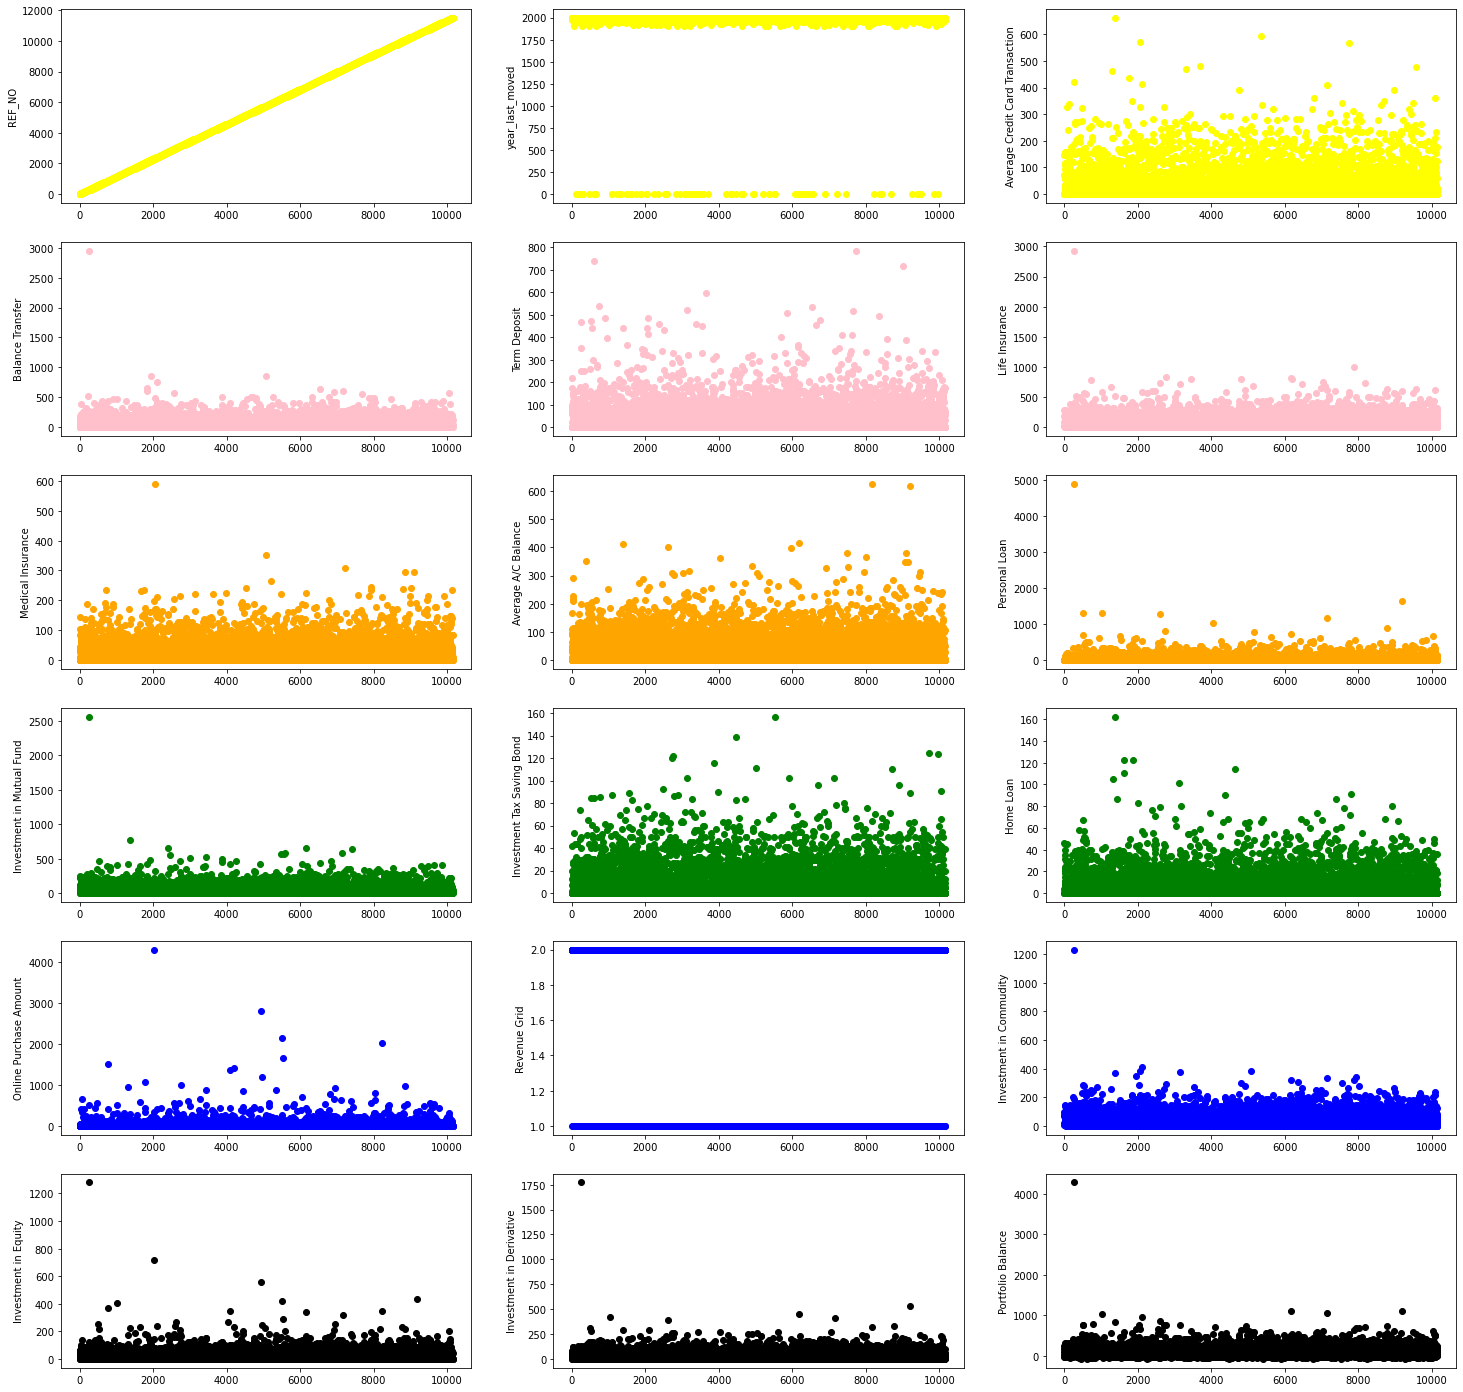

In [10]:
## Plotting a scatter plot for each numeric data. As in above cell 18 columns are there so putting a loop for plotting
## a fraph for each column.

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(25,25))
index = 0
color  = ['yellow','pink','orange','green', 'blue','black']
for nrows in range(0,6):
    for ncols in range(0,3):
        ax[nrows][ncols].scatter(y=numeric_col[col_name[index]], x=numeric_col.index, color=color[nrows])
        ax[nrows][ncols].set_ylabel(col_name[index])
        index = index+1
        
        
## Scaling is required as scale is differnt for each column.
## So in below graph we can see REF_NO is index so we can drop that col.
## In year_last_moved zero value is also given which is not possible in case of year.
## In Balance Transfer, Life Insurance, Medical Insurance and in other few columns one value is behaving differenly, that is 
## an outlier we should drop that value (Will be doing that in data preprocessing).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Credit Card Transaction', ylabel='Density'>

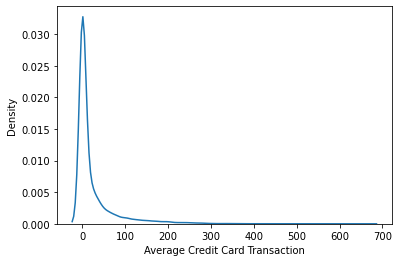

In [11]:
## Checking the skewness of data
sns.distplot(data['Average Credit Card Transaction'], hist=False)
## From below graph we can see that data is right skewed and that is because of imbalance in data set.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Term Deposit', ylabel='Density'>

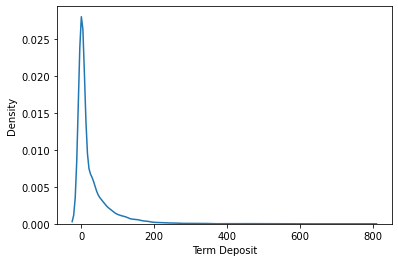

In [12]:
sns.distplot(data['Term Deposit'], hist=False )

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Medical Insurance', ylabel='Density'>

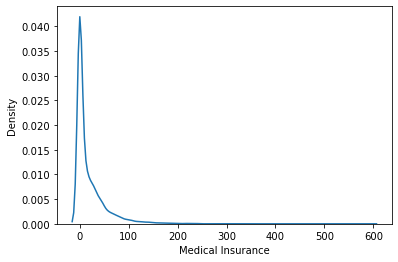

In [13]:
sns.distplot(data['Medical Insurance'], hist=False )

In [14]:
data.loc[data['Life Insurance']>2500,:]

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
250,279,1,41-45,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,9.48,0.0,0.0,2,Male,North,1231.09,1279.1,1771.16,4283.56


In [15]:
## Segregating catagorical data from data set

cat_data = data.select_dtypes(include = np.object)

column_names = list(cat_data.columns)

for column in column_names:
    print('Column ', column)
    print('Number of unique elements ', cat_data[column].nunique())
    print('***************\n')
    
## From below details we can see that in column post_code & post_area lot of unique values are there. So, we'll do 
## onhot codding  for that.

Column  children
Number of unique elements  5
***************

Column  age_band
Number of unique elements  13
***************

Column  status
Number of unique elements  5
***************

Column  occupation
Number of unique elements  9
***************

Column  occupation_partner
Number of unique elements  9
***************

Column  home_status
Number of unique elements  5
***************

Column  family_income
Number of unique elements  13
***************

Column  self_employed
Number of unique elements  2
***************

Column  self_employed_partner
Number of unique elements  2
***************

Column  TVarea
Number of unique elements  14
***************

Column  post_code
Number of unique elements  10040
***************

Column  post_area
Number of unique elements  2039
***************

Column  gender
Number of unique elements  3
***************

Column  region
Number of unique elements  13
***************



## Data Preprocessing

In [16]:
data.shape
# data.columns

(10155, 32)

In [17]:
## Dropping the REF_No column because it is unique id and will not create any impact on data.
## And dropping post code and post area becauase it has lot of unique values.
## Dropping year_last_move also because it seems to be a year which will not creat any impact in prediction.
data = data.drop(['REF_NO','post_code','post_area','year_last_moved'], axis=1)
data = data.loc[data['Life Insurance']<2500, : ]

In [18]:
data.shape

(10154, 28)

In [19]:
numeric_column = data.select_dtypes(include= np.number)
A = numeric_column.quantile(q=0.99, interpolation= 'higher')
B = numeric_column.quantile(q=0.98, interpolation= 'higher')
pd.concat([A,B], axis=1)

,0.99,0.98
Average Credit Card Transaction,241.97,198.48
Balance Transfer,331.88,263.79
Term Deposit,249.84,184.91
Life Insurance,415.71,335.71
Medical Insurance,148.94,120.93
Average A/C Balance,196.39,165.87
Personal Loan,309.82,224.28
Investment in Mutual Fund,265.80,211.44
Investment Tax Saving Bond,57.42,47.42
Home Loan,44.83,36.14


In [20]:
## As we see in scatter plot(mentioned above) few values were at a high distance from dense part. So, we are doing capping 
## data at 99th percentile.
import pickle

column_name = list(numeric_column.columns)
column_name.remove('Revenue Grid')
percentile_dict = {}
for columns in column_name:
    percentile_99 = np.quantile(data[columns], 0.99)
    data.loc[data[columns]>percentile_99, columns] = percentile_99
    percentile_dict.update({columns: percentile_99})
    

In [21]:
data.shape

(10154, 28)

In [22]:
data[column_name].describe()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000
mean,22.783652,45.158886,26.498188,64.719952,18.694454,31.349628,23.695686,41.082617,5.928161,4.313837,15.900789,35.972247,20.925443,31.292465,88.611054
std,46.792945,67.650321,47.016215,84.651424,29.792376,41.526768,53.187349,52.948857,11.781144,8.897285,45.794930,38.108102,24.327893,31.956514,91.307333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.215000,4.670000,8.740000,26.602500
50%,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,23.940000,12.980000,21.335000,66.175000
75%,23.980000,65.240000,34.987500,94.380000,27.470000,46.477500,21.480000,59.480000,5.970000,4.490000,7.980000,50.787500,28.300000,42.980000,125.917500
max,241.959400,330.846500,248.822400,414.962700,148.659100,195.865300,307.541000,264.973200,57.314000,44.739900,309.257600,191.115500,132.717900,167.102700,447.487400


In [23]:
## In our data we can see few of columns have high scale and few of them have a low scale so we'll be scaling our data 
## for balancing the weitage of each column.

scaler = StandardScaler()

scaler.fit(data[column_name])
data[column_name] = scaler.transform(data[column_name])

In [24]:
data.describe()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04,10154.000000,1.015400e+04,1.015400e+04,1.015400e+04,1.015400e+04
mean,1.992366e-16,1.780208e-16,-1.520024e-16,2.386203e-16,-1.126662e-15,1.743949e-16,2.815903e-16,3.537613e-16,1.534019e-16,6.735032e-16,8.006748e-16,1.893047,-8.705531e-17,2.869042e-17,1.012037e-16,1.035873e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,0.309069,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-4.869275e-01,-6.675668e-01,-5.636246e-01,-7.645842e-01,-6.275221e-01,-7.549630e-01,-4.455355e-01,-7.759306e-01,-5.032154e-01,-4.848726e-01,-3.472343e-01,1.000000,-9.439992e-01,-8.601844e-01,-9.792685e-01,-1.829528e+00
25%,-4.869275e-01,-6.675668e-01,-5.636246e-01,-7.645842e-01,-6.275221e-01,-7.549630e-01,-4.455355e-01,-7.759306e-01,-5.032154e-01,-4.848726e-01,-3.472343e-01,2.000000,-7.284177e-01,-6.682142e-01,-7.057583e-01,-6.791525e-01
50%,-4.869275e-01,-4.020709e-01,-5.636246e-01,-3.867810e-01,-6.104028e-01,-3.939732e-01,-4.455355e-01,-3.324620e-01,-5.032154e-01,-4.848726e-01,-3.472343e-01,2.000000,-3.157554e-01,-3.266142e-01,-3.116096e-01,-2.457323e-01
75%,2.556811e-02,2.968515e-01,1.805703e-01,3.503959e-01,2.945713e-01,3.643100e-01,-4.166018e-02,3.474728e-01,3.551518e-03,1.980062e-02,-1.729707e-01,2.000000,3.887882e-01,3.031467e-01,3.657505e-01,4.086012e-01
max,4.684179e+00,4.223213e+00,4.728904e+00,4.137674e+00,4.362561e+00,3.961873e+00,5.336970e+00,4.228639e+00,4.361917e+00,4.543864e+00,6.406195e+00,2.000000,4.071336e+00,4.595464e+00,4.250054e+00,3.930616e+00


In [25]:
data.dtypes

children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
TVarea                              object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Revenue Grid                         int64
gender                              object
region     

## Preprocessing catagorical data

In [26]:
cat_data = data.select_dtypes(include = np.object)
cat_data.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'gender', 'region'],
      dtype='object')

Zero    6208
1       1847
2       1607
3        473
4+        19
Name: children, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


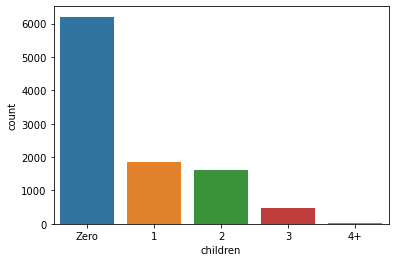

In [27]:
## Plotting a graph to analyis the children column
sns.countplot(data['children'])
print(data['children'].value_counts())

In [28]:
## Encoding the column with get_dummy function.

children_data = pd.get_dummies(data['children'], prefix='children')
data.drop(['children'], axis=1, inplace=True)
data = pd.concat([data,children_data], axis=1)

In [29]:
## Encoding age band with the help of one hot encoder
print(data['age_band'].value_counts())

age_band_data = pd.get_dummies(data['age_band'], prefix='age_band')
data.drop(['age_band'], axis=1, inplace=True)
data = pd.concat([data,age_band_data], axis=1)

45-50      1359
36-40      1134
41-45      1111
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64


Partner                 7708
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

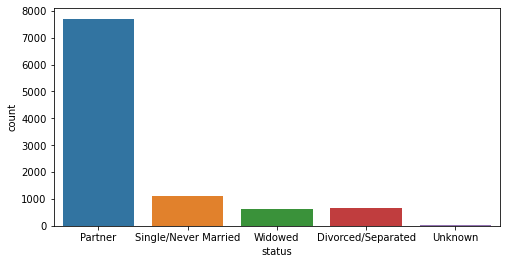

In [30]:
## Analysing staus column
print(data['status'].value_counts())
plt.figure(figsize=(8,4))
sns.countplot(data['status'])
plt.tight_layout


In [31]:
# From above graph we can see that there are some unknown values available in status column. SO, as it is a catagorical column
# so replacing this un known value with partner value.

data.loc[data['status']=='Unknown', 'status'] = 'Partner'

status_data = pd.get_dummies(data['status'], prefix='status')
data.drop(['status'], axis=1, inplace=True)
data = pd.concat([data,status_data], axis=1)

In [32]:
data.head()

,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average Credit Card Transaction,Balance Transfer,Term Deposit,...,age_band_51-55,age_band_55-60,age_band_61-65,age_band_65-70,age_band_71+,age_band_Unknown,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Widowed
0,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,HTV,2.685502,1.445609,-0.563625,...,1,0,0,0,0,0,0,1,0,0
1,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,Granada,-0.486928,0.440834,-0.563625,...,0,1,0,0,0,0,0,0,1,0
2,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,Tyne Tees,-0.486928,1.792853,-0.117161,...,0,0,0,0,0,0,0,0,1,0
3,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,Central,-0.486928,-0.667567,-0.563625,...,0,0,0,0,0,0,0,0,1,0
4,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,Scottish TV,1.082831,0.189234,-0.563625,...,0,0,0,0,0,0,0,1,0,0


In [33]:
## Analysing occupation column
print(data['occupation'].value_counts())

Professional         2448
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64


In [34]:
# Encoing the occupation column
occupation_data = pd.get_dummies(data['occupation'], prefix='occupation')
data.drop(['occupation'], axis=1, inplace=True)
data = pd.concat([data,occupation_data], axis=1)

In [35]:
## Analysing the occupation_partner
print(data['occupation_partner'].value_counts())

occupation_partner_data = pd.get_dummies(data['occupation_partner'], prefix='occupation_partner')
data.drop(['occupation_partner'], axis=1, inplace=True)
data = pd.concat([data,occupation_partner_data], axis=1)

Unknown              2394
Professional         2050
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64


In [36]:
## Analysing home_status column

print(data['home_status'].value_counts())

Own Home                9412
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64


In [37]:
## Basically there are only two catagory available in home Rented or Own so converting all value to rented other then own home.

data.loc[~(data['home_status']=='Own Home'), 'home_status']= 'Rented Home'

home_status_data = pd.get_dummies(data['home_status'], prefix='home_status')
data.drop(['home_status'], axis=1, inplace=True)
data = pd.concat([data,home_status_data], axis=1)

In [38]:
## Analysing Family_income column

print(data['family_income']. value_counts())

>=35,000             2516
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64


In [39]:
family_income_data = pd.get_dummies(data['family_income'], prefix='family_income')
data.drop(['family_income'], axis=1, inplace=True)
data = pd.concat([data,family_income_data], axis=1)

In [40]:
## Analysing self_employeed column
print(data['self_employed'].value_counts())

self_employed_data = pd.get_dummies(data['self_employed'], prefix='self_employed')
data.drop(['self_employed'], axis=1, inplace=True)
data = pd.concat([data,self_employed_data], axis=1)

No     9435
Yes     719
Name: self_employed, dtype: int64


In [41]:
## Analysing gender column
print(data['gender'].value_counts())

gender_data = pd.get_dummies(data['gender'], prefix='gender')
data.drop(['gender'], axis=1, inplace=True)
data = pd.concat([data,gender_data], axis=1)

Female     7634
Male       2485
Unknown      35
Name: gender, dtype: int64


In [42]:
## Analysing gender column
print(data['self_employed_partner'].value_counts())

self_employed_partner_data = pd.get_dummies(data['self_employed_partner'], prefix='self_employed_partner')
data.drop(['self_employed_partner'], axis=1, inplace=True)
data = pd.concat([data,self_employed_partner_data], axis=1)

No     9025
Yes    1129
Name: self_employed_partner, dtype: int64


In [43]:
data.select_dtypes(np.object)

,TVarea,region
0,HTV,Wales
1,Granada,North West
2,Tyne Tees,North
3,Central,West Midlands
4,Scottish TV,Scotland
...,...,...
10150,Carlton,South East
10151,Meridian,South East
10152,Central,South East
10153,Carlton,South East


In [44]:
## Analyzing the TVarea column & region column.
## Intuitively, TVarea & region column don't make snese to predict the high transaction or low transaction user. SO dropping this column

data.drop(['TVarea', 'region'], axis=1, inplace=True)

In [45]:
data.shape

(10154, 78)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10154
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Average Credit Card Transaction       10154 non-null  float64
 1   Balance Transfer                      10154 non-null  float64
 2   Term Deposit                          10154 non-null  float64
 3   Life Insurance                        10154 non-null  float64
 4   Medical Insurance                     10154 non-null  float64
 5   Average A/C Balance                   10154 non-null  float64
 6   Personal Loan                         10154 non-null  float64
 7   Investment in Mutual Fund             10154 non-null  float64
 8   Investment Tax Saving Bond            10154 non-null  float64
 9   Home Loan                             10154 non-null  float64
 10  Online Purchase Amount                10154 non-null  float64
 11  Revenue Grid   

In [47]:
## Converting targate variable to 0 & 1 form
print(data['Revenue Grid'].value_counts())

data['Revenue Grid'] = data['Revenue Grid'].map({1:0, 2:1})

## Data seems to be imbalance by below figure

2    9068
1    1086
Name: Revenue Grid, dtype: int64


## Modeling Data Preparation

In [52]:
data.reset_index(drop=True, inplace=True)

feature_df = data.drop(['Revenue Grid'], axis=1)
target_df = data['Revenue Grid']

In [53]:
feature_df.shape, target_df.shape

((10154, 77), (10154,))

In [54]:
feature_df.corr()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,...,"family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,gender_Female,gender_Male,gender_Unknown,self_employed_partner_No,self_employed_partner_Yes
Average Credit Card Transaction,1.000000,0.133812,0.330430,0.149222,0.402778,0.166339,0.108859,0.149536,0.124466,0.074004,...,0.016858,0.016233,-0.019541,-0.002437,0.002437,-0.004210,0.001416,0.020647,-0.008180,0.008180
Balance Transfer,0.133812,1.000000,0.231211,0.515221,0.168874,0.378207,0.156859,0.362549,0.167743,0.168025,...,0.008741,0.023945,-0.010237,-0.016115,0.016115,-0.004026,0.002124,0.014093,-0.013534,0.013534
Term Deposit,0.330430,0.231211,1.000000,0.291788,0.502971,0.274728,0.160412,0.221332,0.185480,0.167700,...,0.012872,0.028095,-0.022190,-0.001147,0.001147,-0.004046,0.003018,0.007682,-0.017377,0.017377
Life Insurance,0.149222,0.515221,0.291788,1.000000,0.245690,0.523333,0.243490,0.487143,0.272252,0.293408,...,0.018248,0.033351,-0.007604,-0.021572,0.021572,-0.008452,0.007750,0.005441,-0.039788,0.039788
Medical Insurance,0.402778,0.168874,0.502971,0.245690,1.000000,0.264693,0.147610,0.238870,0.206889,0.143825,...,0.011874,0.025227,-0.010182,0.000352,-0.000352,-0.000337,-0.001065,0.010291,-0.009651,0.009651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gender_Female,-0.004210,-0.004026,-0.004046,-0.008452,-0.000337,0.002692,0.008914,0.007932,0.000884,-0.010940,...,-0.033229,-0.102232,0.011785,0.106270,-0.106270,1.000000,-0.990763,-0.102363,-0.110379,0.110379
gender_Male,0.001416,0.002124,0.003018,0.007750,-0.001065,-0.005045,-0.009926,-0.009815,-0.001796,0.011074,...,0.032944,0.100418,-0.010935,-0.106306,0.106306,-0.990763,1.000000,-0.033478,0.111707,-0.111707
gender_Unknown,0.020647,0.014093,0.007682,0.005441,0.010291,0.017170,0.007117,0.013542,0.006662,-0.000607,...,0.003244,0.016843,-0.006645,-0.003417,0.003417,-0.102363,-0.033478,1.000000,-0.005925,0.005925
self_employed_partner_No,-0.008180,-0.013534,-0.017377,-0.039788,-0.009651,-0.020039,-0.040002,-0.016656,-0.011724,-0.039377,...,-0.013156,-0.064765,0.017500,0.246776,-0.246776,-0.110379,0.111707,-0.005925,1.000000,-1.000000


In [56]:
# craeting a function that will sellect the highly correlated features

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [62]:
## Finding out the variable which are 0.80 or more correlated.
corr_feature = correlation(feature_df, 0.80)
len(set(corr_feature))
print(corr_feature)

{'Portfolio Balance', 'Investment in Derivative'}


In [63]:
# Dropping highly correlated columns.
feature_df.drop(['Portfolio Balance','Investment in Derivative'], axis=1)

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,...,"family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown,self_employed_No,self_employed_Yes,gender_Female,gender_Male,gender_Unknown,self_employed_partner_No,self_employed_partner_Yes
0,2.685502,1.445609,-0.563625,0.203669,-0.627522,-0.032743,-0.445536,0.394124,1.193647,-0.484873,...,0,0,0,1,0,1,0,0,1,0
1,-0.486928,0.440834,-0.563625,-0.457545,-0.627522,-0.754963,-0.445536,-0.775931,-0.503215,-0.484873,...,0,0,0,1,0,1,0,0,1,0
2,-0.486928,1.792853,-0.117161,2.677583,-0.242170,3.265293,-0.445536,-0.473926,-0.503215,-0.092599,...,1,0,0,0,1,0,1,0,1,0
3,-0.486928,-0.667567,-0.563625,-0.522521,-0.627522,0.195314,-0.445536,0.082298,-0.503215,-0.484873,...,0,0,0,1,0,1,0,0,1,0
4,1.082831,0.189234,-0.563625,1.331408,0.780626,0.195555,-0.239273,3.243995,-0.503215,4.543864,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10149,-0.486928,-0.667567,-0.563625,-0.410527,-0.409670,-0.754963,-0.276502,-0.634466,-0.122079,-0.484873,...,1,0,0,1,0,1,0,0,1,0
10150,-0.486928,0.972565,-0.563625,1.603006,-0.627522,-0.682958,-0.445536,-0.492813,-0.503215,-0.484873,...,0,0,0,1,0,1,0,0,1,0
10151,2.183051,-0.667567,0.595182,-0.764584,2.206228,-0.754963,-0.445536,-0.775931,-0.503215,-0.484873,...,0,1,0,1,0,1,0,0,1,0
10152,-0.486928,-0.135688,-0.563625,-0.764584,-0.627522,-0.754963,-0.445536,-0.587438,-0.503215,0.412074,...,0,0,0,1,0,1,0,0,0,1


## Splitting the train and test data

In [74]:
splits_ins = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state= 1000)
splits = splits_ins.split(feature_df, target_df)

for train_index, val_index in splits:
    feature_train = feature_df.loc[train_index, :]
    target_train = target_df[train_index]    
    feature_val = feature_df.iloc[val_index,:]   
    target_val = target_df[val_index] 

In [75]:
feature_train.shape,feature_val.shape,target_train.shape,target_val.shape

((8123, 77), (2031, 77), (8123,), (2031,))

In [79]:
target_train.value_counts()

1    7254
0     869
Name: Revenue Grid, dtype: int64

# Modeling

## 1). Liner Regression Model

In [82]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression(class_weight='balanced', max_iter=200, random_state=1000)

In [83]:
## Fitting the train model to regression model
LR_Model.fit(feature_train, target_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=1000)

In [84]:
## Finding the probability for claas 
prediction_trate = LR_Model.predict_proba(feature_train)

In [85]:
## fiding the predicted claas
pd.DataFrame(prediction_rate)

,0,1
0,0.032452,0.967548
1,0.069402,0.930598
2,0.051287,0.948713
3,0.082608,0.917392
4,0.000808,0.999192
...,...,...
8118,0.722893,0.277107
8119,0.068329,0.931671
8120,0.047176,0.952824
8121,0.046182,0.953818


In [90]:
predict = LR_Model.predict(feature_train)
pd.Series(predict)

0       1
1       1
2       1
3       1
4       1
       ..
8118    0
8119    1
8120    1
8121    1
8122    1
Length: 8123, dtype: int64

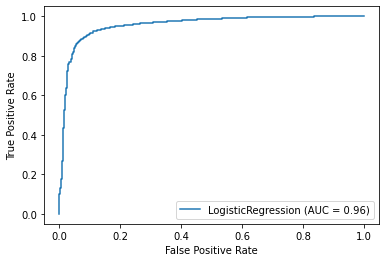

In [89]:
## Plotting the roc curve for the model performance

plot_roc_curve(LR_Model, X= feature_train, y=target_train)

In [102]:
cnf_matrix = confusion_matrix(target_train, predict)
print('Confusion Matrix: \n',cnf_matrix)
print('\nf1 Score for training data: ',f1_score(y_true=target_train, y_pred= predict, sample_weight=target_train))

Confusion Matrix: 
 [[ 782   87]
 [ 649 6605]]

f1 Score for training data:  0.9531712244750703


Confusion Matrix: 
 [[ 197   20]
 [ 170 1644]]

f1 Score for training data:  0.9508386350491614


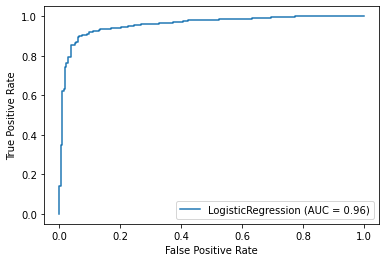

In [135]:
## Performance for test data

pred_val = LR_Model.predict(feature_val)
plot_roc_curve(LR_Model, X=feature_val, y=target_val)
cnf_matrix = confusion_matrix(target_val, pred_val)
print('Confusion Matrix: \n',cnf_matrix)
print('\nf1 Score for training data: ',f1_score(y_true=target_val, y_pred= pred_val, sample_weight=target_val))